<a href="https://colab.research.google.com/github/sidhu2690/Academic-materials/blob/main/Electromagnetic_Shower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [199]:
class particle_shower(object):
  def __init__(self, E0, X, E_cut):
    self.E0 = E0
    self.X  = X

    self.Ec = E_cut
    self.particle_type = {0: "Electron", 1: "Positron", 2: "Photon"}
    self.particles = np.array([[0, E0, 0]])
    self.particles_in_depth = np.zeros(X+1)


  def shower(self):

    for depth in range(1, self.X+1):
      new_particles = []


      for particle_type, energy, p_depth in self.particles:

        if int(p_depth) == depth - 1 and energy >= self.Ec:

          if particle_type in [0, 1]:
            E_out = energy * np.exp(-1)
            gamma = energy - E_out

            if E_out > self.Ec:
              new_particles.append([particle_type, E_out, depth])

            if gamma > self.Ec:
              new_particles.append([2, gamma, depth])

          elif particle_type == 2:
            E_pair = energy / 2

            if E_pair > self.Ec:
              new_particles.append([0, E_pair, depth])
              new_particles.append([1, E_pair, depth])

      if new_particles:
          self.particles = np.vstack([self.particles, new_particles])
      self.particles_in_depth[depth] = np.sum(self.particles[:, 2] == depth)


  def print_summary(self):
    print(f"Initial Energy: {self.E0} GeV | X = {self.X} X_0 | Critical Energy: {self.Ec} GeV "), print("")
    print("Depth-wise particle count:")
    for d in range(self.X + 1):
        count = int(np.sum(self.particles[:, 2] == d))
        print(f"\nX0={d}: {count} particles")

        particles_at_d = self.particles[self.particles[:, 2] == d]

        for particle_type, energy, _ in particles_at_d:
            p_name = self.particle_type[int(particle_type)]
            print(f"    {p_name:8} | Energy = {energy:.4f} GeV")
    print(f"\nTotal particles: {len(self.particles)}")

  def plot_shower(self):
    plt.figure(figsize=(8, 6))

    depths = np.arange(0, self.X + 1)
    counts = self.particles_in_depth

    plt.bar(depths, counts, color='skyblue', edgecolor='black')

    plt.xlabel("Depth (in X0)")
    plt.ylabel("Number of Particles")
    plt.title("Number of Particles per Layer in EM Shower")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

In [200]:
simulation = particle_shower(E0 = 10, X = 10, E_cut = 0.05)
simulation.shower()
simulation.print_summary()

Initial Energy: 10 GeV | X = 10 X_0 | Critical Energy: 0.05 GeV 

Depth-wise particle count:

X0=0: 1 particles
    Electron | Energy = 10.0000 GeV

X0=1: 2 particles
    Electron | Energy = 3.6788 GeV
    Photon   | Energy = 6.3212 GeV

X0=2: 4 particles
    Electron | Energy = 1.3534 GeV
    Photon   | Energy = 2.3254 GeV
    Electron | Energy = 3.1606 GeV
    Positron | Energy = 3.1606 GeV

X0=3: 8 particles
    Electron | Energy = 0.4979 GeV
    Photon   | Energy = 0.8555 GeV
    Electron | Energy = 1.1627 GeV
    Positron | Energy = 1.1627 GeV
    Electron | Energy = 1.1627 GeV
    Photon   | Energy = 1.9979 GeV
    Positron | Energy = 1.1627 GeV
    Photon   | Energy = 1.9979 GeV

X0=4: 16 particles
    Electron | Energy = 0.1832 GeV
    Photon   | Energy = 0.3147 GeV
    Electron | Energy = 0.4277 GeV
    Positron | Energy = 0.4277 GeV
    Electron | Energy = 0.4277 GeV
    Photon   | Energy = 0.7350 GeV
    Positron | Energy = 0.4277 GeV
    Photon   | Energy = 0.7350 GeV
    E

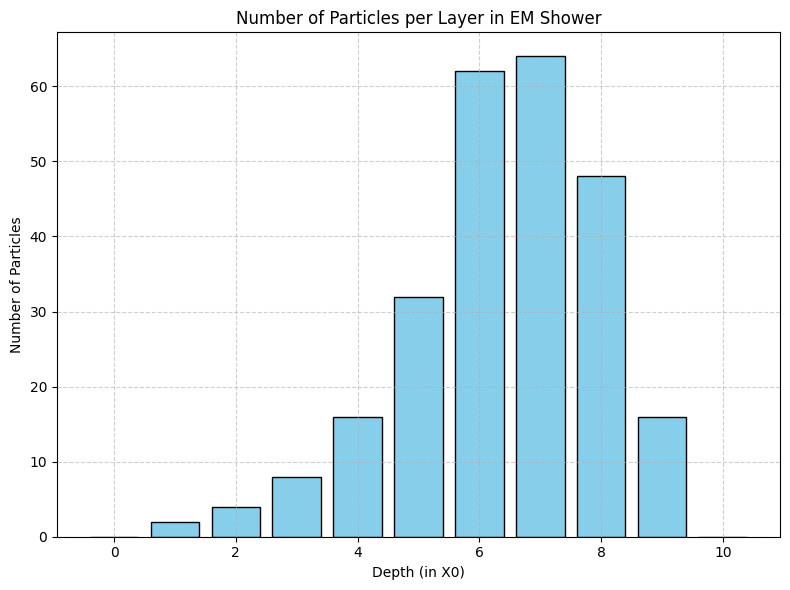

In [201]:
simulation.plot_shower()